In [1]:
import numpy as np
from util.guided_ot import accumulated_proj_diff_dijkstra, augmented_dijkstra
from util.pqdict import pqdict
from util.trajectories import *
from util.simplicial_paths import *
from util.alg_perf import dijkstra_tree, plot_proj_diffs

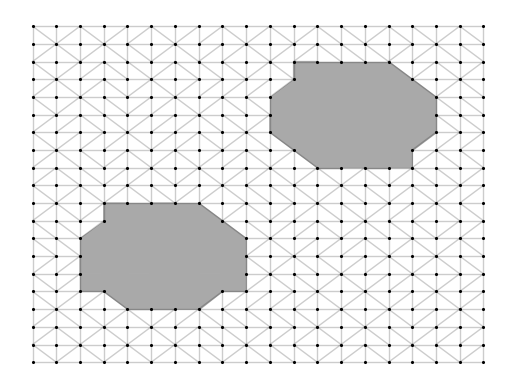

In [2]:
n_side, point_gen_mode = 20, 0

r1, r2 = 0.6, 0.3
n_holes = 2
angle = 2 * np.pi / n_holes
phase = np.pi/4
hole_locs = [(r1 * np.cos(angle * i + phase), r1 * np.sin(angle * i + phase)) for i in range(n_holes)]
hole_locs += np.array([0.0, 0.05])

# Initialize Simplicial Complex (SC)
pts = generate_pts(point_gen_mode, n_side)
SC = SimplicialComplex(pts, True)
n_side, point_gen_mode = 20, 0
start, end = 0, len(SC.node_vec)-1

all_faces = np.arange(SC.face_vec.shape[0])
faces_to_add = {2:set(all_faces)}
SC.add_simplices(faces_to_add)
SC.make_holes(hole_locs, r2)
SC.plot()

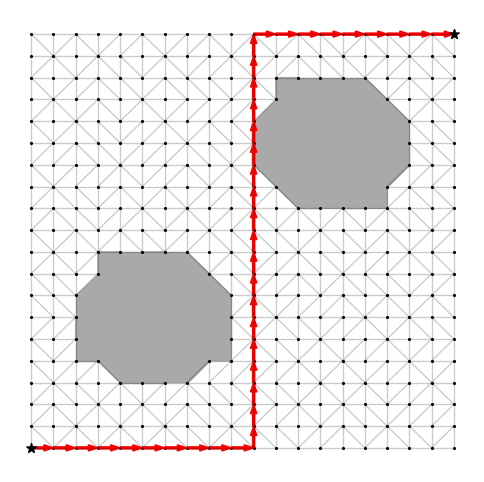

In [3]:
ref_path_coords = [(-1,-1), (0,-1), (0,1), (1,1)]
num_paths, num_nodes = 1, 1

ref_path_class = Trajectory_Class(SC)
ref_path_class.generate_paths(ref_path_coords, num_paths, num_nodes, 1e-1)
ref_path = ref_path_class.paths[0]
ref_path_proj = ref_path.edge_projections[-1]
ref_path_class.plot_paths('red', 'reference')
start, end = ref_path.nodes[0], ref_path.nodes[-1]

0-1-22-23-24-45-46-67-68-89-109-129-149-169-189-209-229-249-269-290-310-331-351-352-372-373-374-395-396-397-398-399


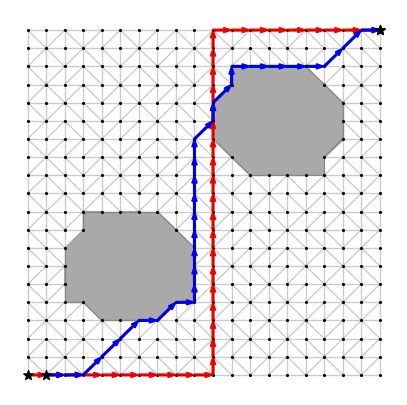

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1-2-3-24-45-66-67-88-89-109-129-149-169-189-209-229-249-269-290-310-331-351-352-353-354-355-356-377-398-399


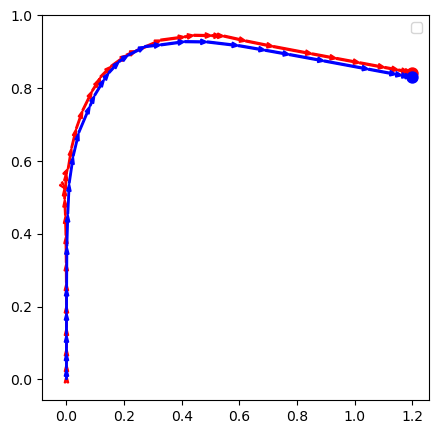

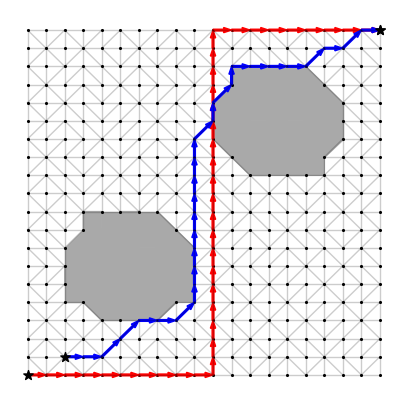

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


22-23-24-45-66-67-68-89-109-129-149-169-189-209-229-249-269-290-310-331-351-352-353-354-355-376-377-398-399


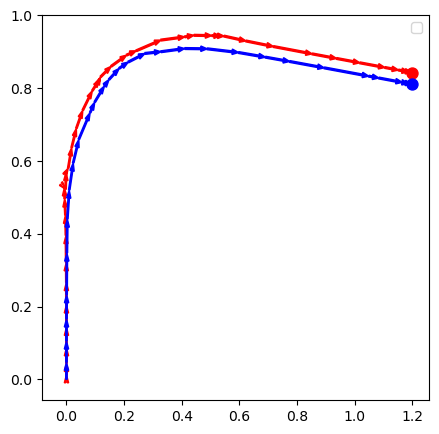

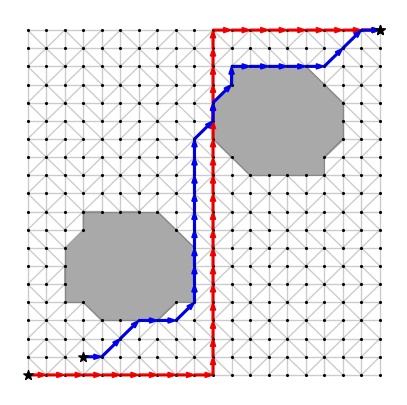

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


23-24-45-66-67-68-89-109-129-149-169-189-209-229-249-269-290-310-331-351-352-353-354-355-356-377-398-399


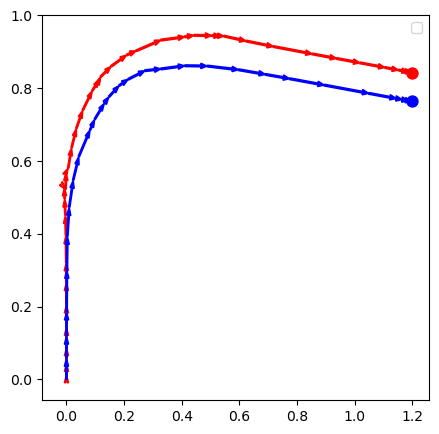

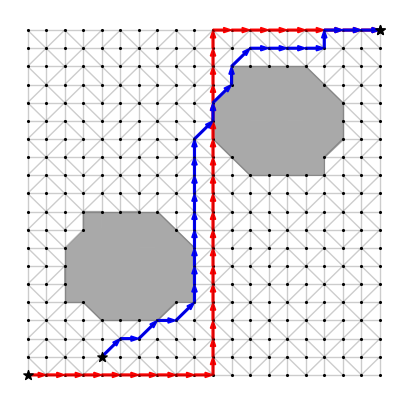

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


24-45-46-67-68-89-109-129-149-169-189-209-229-249-269-290-310-331-351-372-373-374-375-376-396-397-398-399


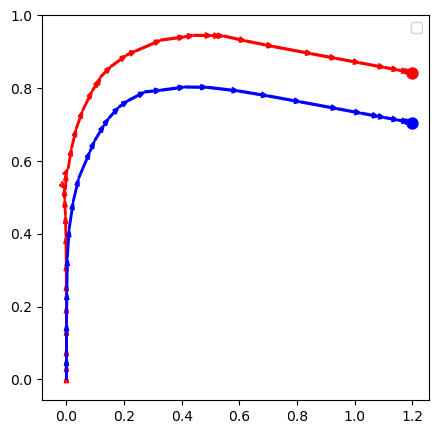

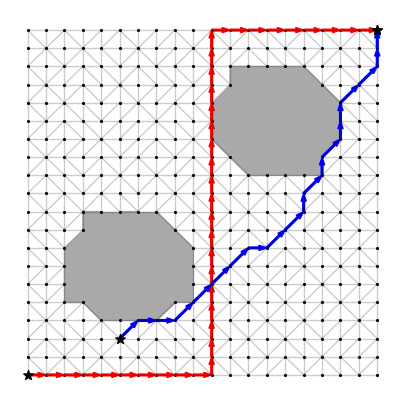

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


45-66-67-68-89-110-131-152-153-174-195-215-236-256-277-297-317-338-359-379-399


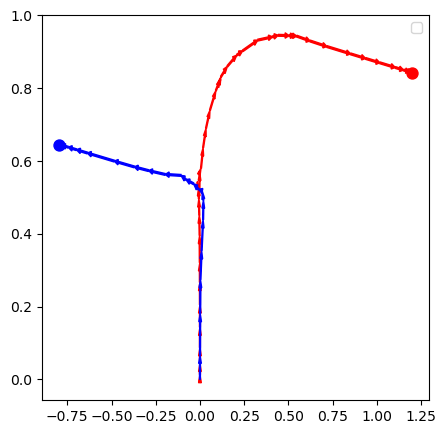

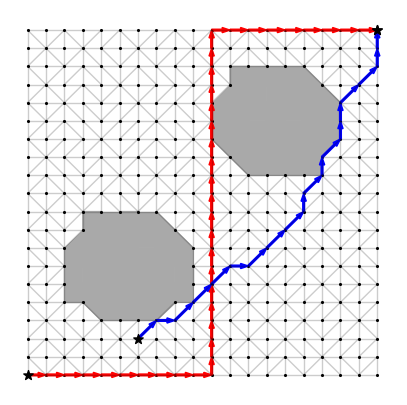

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


46-67-68-89-110-131-132-153-174-195-215-236-256-277-297-317-338-359-379-399


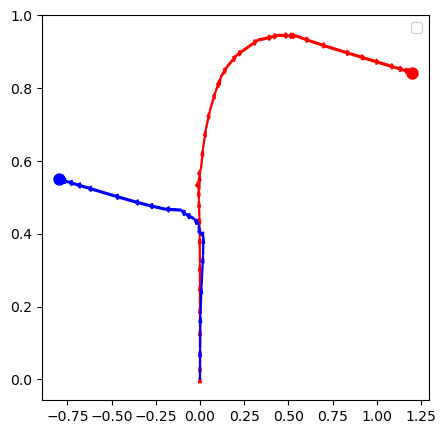

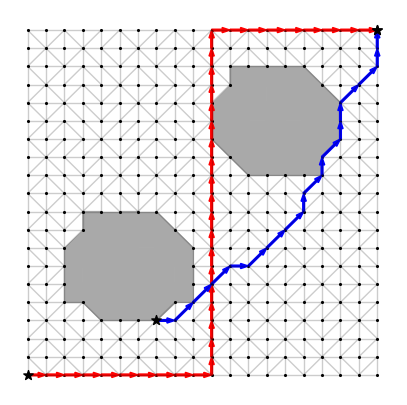

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


67-68-89-110-131-132-153-174-195-215-236-256-277-297-317-338-359-379-399


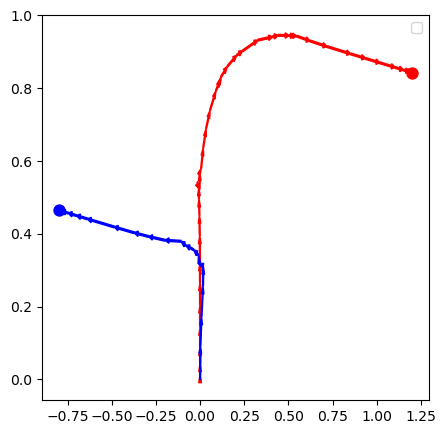

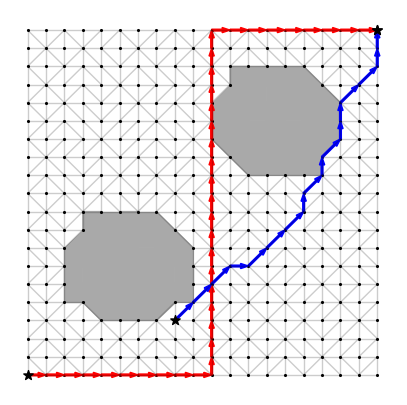

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


68-89-110-131-132-153-174-195-215-236-256-277-297-317-338-359-379-399


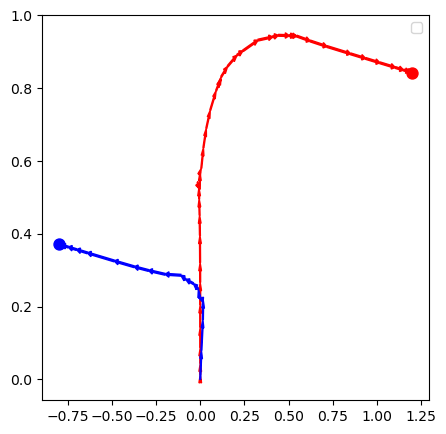

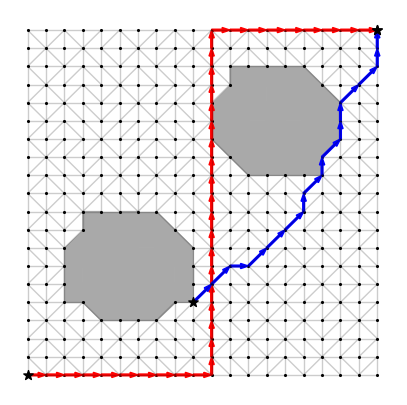

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


89-110-131-132-153-174-195-215-236-256-277-297-317-338-359-379-399


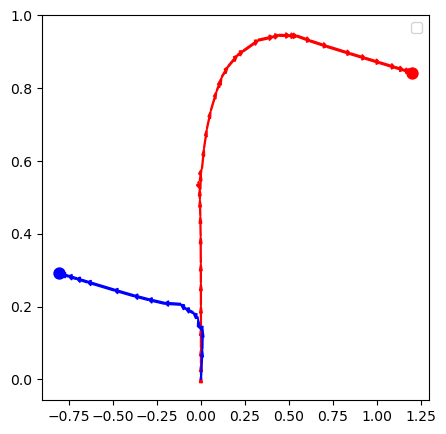

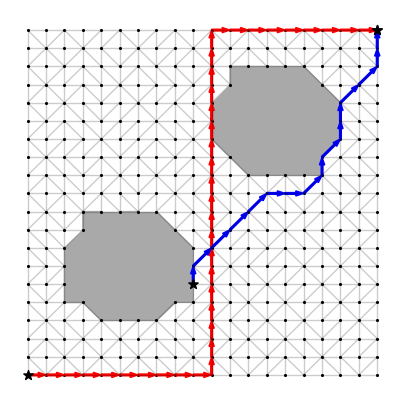

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


109-129-150-171-192-213-214-215-236-256-277-297-317-338-359-379-399


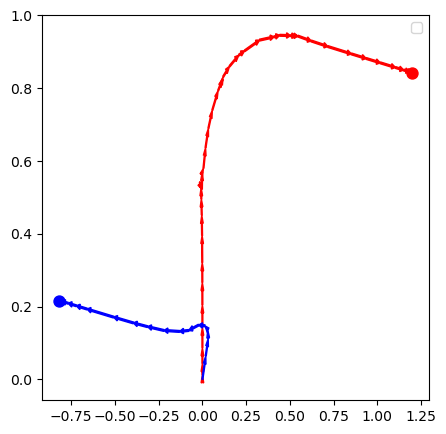

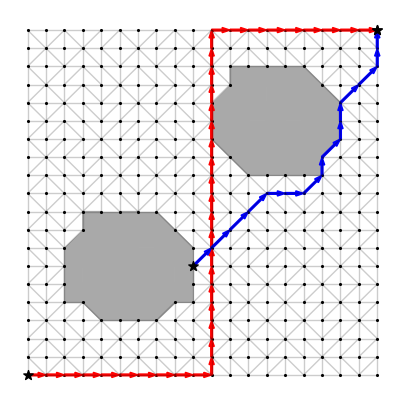

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


129-150-171-192-213-214-215-236-256-277-297-317-338-359-379-399


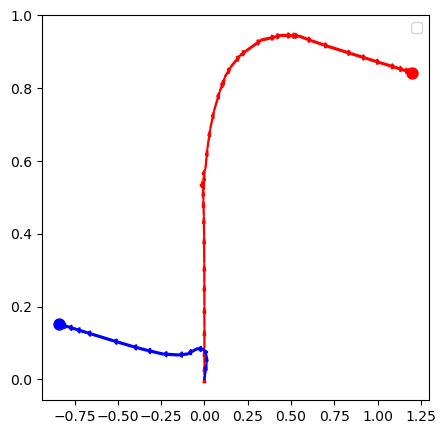

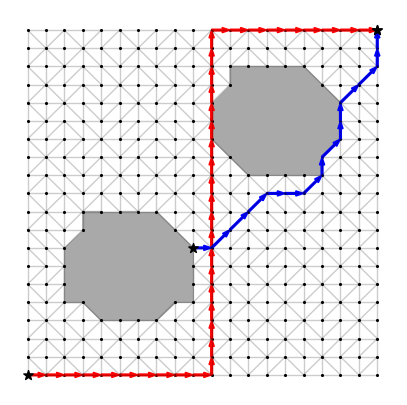

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


149-150-171-192-213-214-215-236-256-277-297-317-338-359-379-399


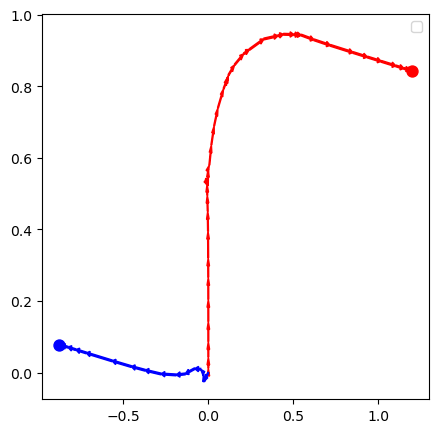

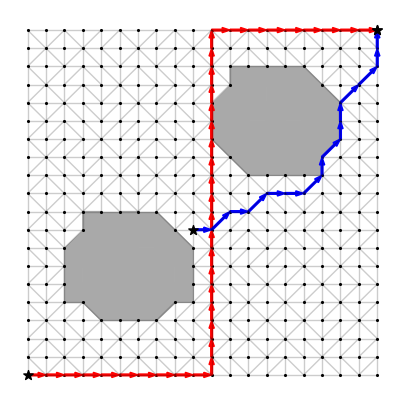

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


169-170-191-192-213-214-215-236-256-277-297-317-338-359-379-399


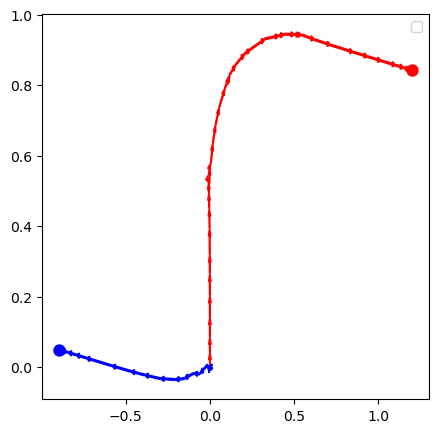

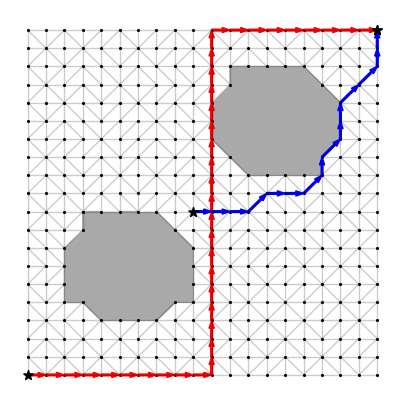

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


189-190-191-192-213-214-215-236-256-277-297-317-338-359-379-399


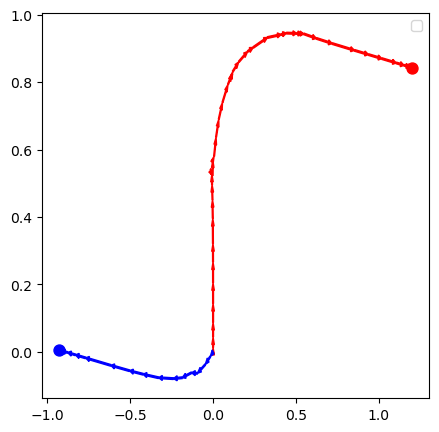

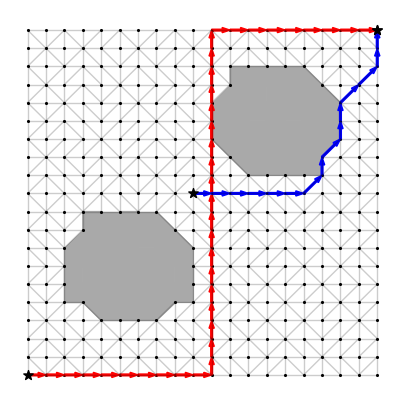

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


209-210-211-212-213-214-215-236-256-277-297-317-338-359-379-399


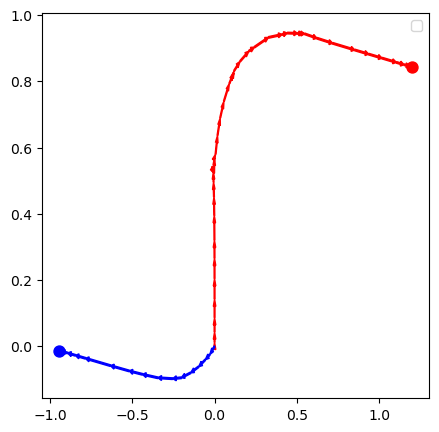

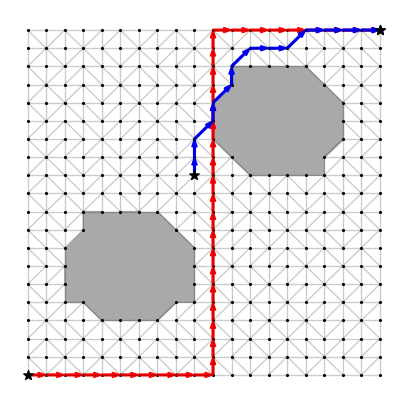

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


229-249-269-290-310-331-351-372-373-374-395-396-397-398-399


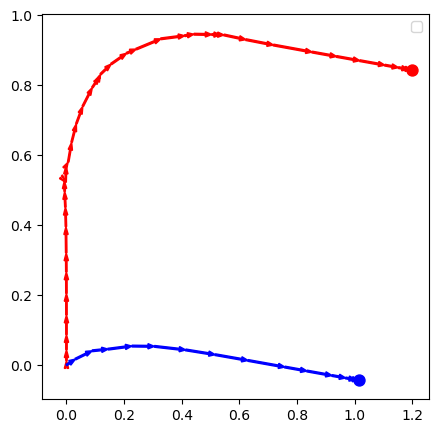

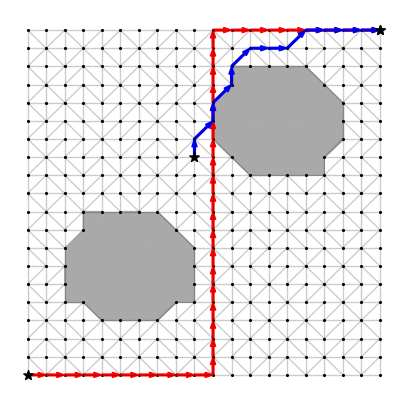

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


249-269-290-310-331-351-372-373-374-395-396-397-398-399


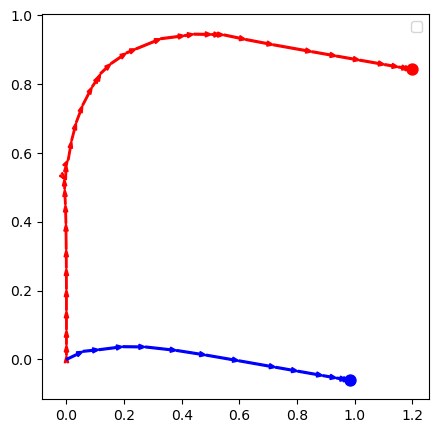

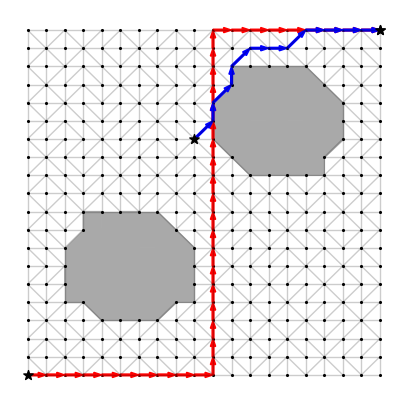

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


269-290-310-331-351-372-373-374-395-396-397-398-399


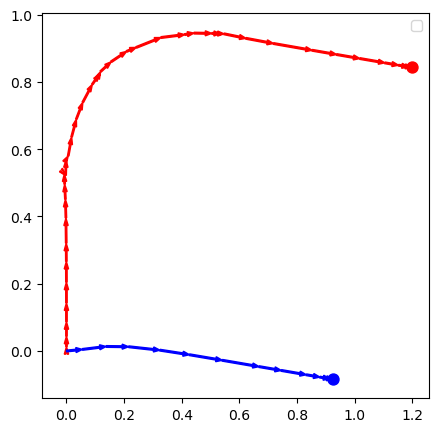

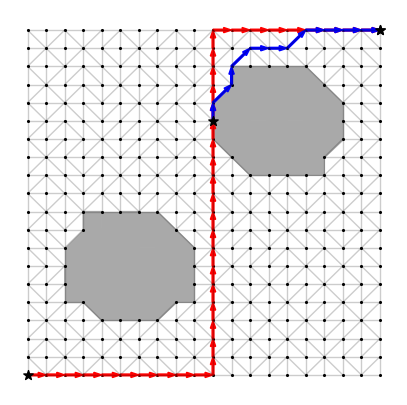

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


290-310-331-351-372-373-374-395-396-397-398-399


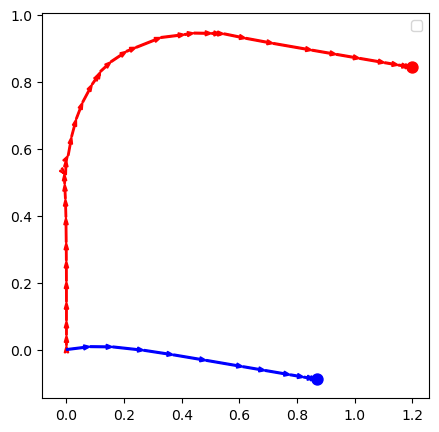

In [14]:
alpha = 1
shortest, others = accumulated_proj_diff_dijkstra(SC, start, end, ref_path, alpha, other=True)
print(shortest)
for i in range(len(shortest.nodes)):
    start_i = shortest.nodes[i+1]
    path, _ = accumulated_proj_diff_dijkstra(SC, start_i, end, ref_path, alpha, other=True)
    dijkstra_tree(SC, path, [], ref_path_class, plot_others=False)
    print(path)